# Time Series #1

In [1]:
import pandas as pd

### 1. 데이터를 로드하고 각 열의 데이터 타입을 파악하라

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/pandas/main/timeTest.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Yr_Mo_Dy  6574 non-null   object 
 1   RPT       6568 non-null   float64
 2   VAL       6571 non-null   float64
 3   ROS       6572 non-null   float64
 4   KIL       6569 non-null   float64
 5   SHA       6572 non-null   float64
 6   BIR       6574 non-null   float64
 7   DUB       6571 non-null   float64
 8   CLA       6572 non-null   float64
 9   MUL       6571 non-null   float64
 10  CLO       6573 non-null   float64
 11  BEL       6574 non-null   float64
 12  MAL       6570 non-null   float64
dtypes: float64(12), object(1)
memory usage: 667.8+ KB


In [3]:
df.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### 2. Yr_Mo_Dy을 판다스에서 인식할 수 있는 datetime64타입으로 변경하라

In [4]:
df['Yr_Mo_Dy'] = pd.to_datetime(df.Yr_Mo_Dy)
df.Yr_Mo_Dy

0      2061-01-01
1      2061-01-02
2      2061-01-03
3      2061-01-04
4      2061-01-05
          ...    
6569   1978-12-27
6570   1978-12-28
6571   1978-12-29
6572   1978-12-30
6573   1978-12-31
Name: Yr_Mo_Dy, Length: 6574, dtype: datetime64[ns]

### 3. Yr_Mo_Dy에 존재하는 년도의 유일값을 모두 출력하라

In [5]:
df.Yr_Mo_Dy.dt.year.unique()

array([2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978])

### 4. Yr_Mo_Dy에 년도가 2061년 이상의 경우에는 모두 잘못된 데이터이다. 해당경우의 값은 100을 빼서 새롭게 날짜를 Yr_Mo_Dy 컬럼에 정의하라

In [6]:
df.Yr_Mo_Dy.dt.year.map(lambda x: x-100 if x >= 2061 else x)

0       1961
1       1961
2       1961
3       1961
4       1961
        ... 
6569    1978
6570    1978
6571    1978
6572    1978
6573    1978
Name: Yr_Mo_Dy, Length: 6574, dtype: int64

In [7]:
def fix_century(x):
    import datetime
    
    year = x.year - 100 if x.year >= 2061 else x.year
    return pd.to_datetime(datetime.date(year, x.month, x.day))

df['Yr_Mo_Dy'] = df['Yr_Mo_Dy'].apply(fix_century)
df['Yr_Mo_Dy'].dt.year.unique()

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978])

### 5. 년도별 각컬럼의 평균값을 구하여라

In [8]:
df.groupby(df['Yr_Mo_Dy'].dt.year).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


### 6. weekday컬럼을 만들고 요일별로 매핑하라 ( 월요일: 0 ~ 일요일 :6)

#### 6-1. dt.weekday : 요일 정보를 숫자로 추출
    0은 월요일, 1은 화요일, ..., 6은 일요일을 의미합니다.

#### 6-2. dt.day_name() : 요일의 영어 이름을 추출

#### 6-3. 요일의 한글 이름을 추출
    #0~6번 인덱스 위치에 각 한글 요일 이름이 담긴 리스트
    weekday_list = ['월', '화', '수', '목', '금', '토', '일']
    #apply 함수로 숫자 -> 요일 이름으로 변환
    df['요일'] = df.apply(lambda x : weekday_list[x['weekday']], axis = 1)

In [9]:
df['weekday'] = df['Yr_Mo_Dy'].dt.weekday
df['weekday']

0       6
1       0
2       1
3       2
4       3
       ..
6569    2
6570    3
6571    4
6572    5
6573    6
Name: weekday, Length: 6574, dtype: int64

### 7. weekday컬럼을 기준으로 주말이면 1 평일이면 0의 값을 가지는 WeekCheck 컬럼을 만들어라

In [10]:
df['WeekCheck'] = df.weekday.map(lambda x: 1 if x == 5 or x == 6 else 0)
df['WeekCheck']

0       1
1       0
2       0
3       0
4       0
       ..
6569    0
6570    0
6571    0
6572    1
6573    1
Name: WeekCheck, Length: 6574, dtype: int64

In [11]:
df['WeekCheck']  = df['weekday'].map(lambda x : 1 if x in [5,6] else 0)

Ans = df['WeekCheck'].head(3).to_frame()

### 8. 년도, 일자 상관없이 모든 컬럼의 각 달의 평균을 구하여라

In [12]:
df.groupby(df['Yr_Mo_Dy'].dt.month).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,weekday,WeekCheck
Yr_Mo_Dy,,,,,,,,,,,,,,
1,14.847325,12.914560,13.299624,7.199498,11.667734,8.054839,11.819355,9.512047,9.543208,10.053566,14.550520,18.028763,2.989247,0.284946
2,13.710906,12.111122,12.879132,6.942411,11.551772,7.633858,11.206024,9.341437,9.313169,9.518051,13.728898,17.156142,3.005906,0.287402
3,13.158687,11.505842,12.648118,7.265907,11.554516,7.959409,11.310179,9.635896,9.700324,10.096953,13.810609,16.909317,3.000000,0.283154
4,12.555648,10.429759,12.204815,6.898037,10.677667,7.441389,10.221315,8.909056,8.930870,9.158019,12.664759,14.937611,3.011111,0.288889
5,11.724032,10.145619,11.550394,6.307487,10.224301,6.942061,8.797738,8.452903,8.040806,8.524857,12.767258,13.736039,2.982079,0.283154
6,10.451317,8.949704,10.361315,5.652278,9.529926,6.410093,8.009556,7.920796,7.639796,7.729185,12.246407,12.861818,3.007407,0.285185
7,9.992007,8.357778,9.349642,5.416935,9.302634,5.972348,7.843501,7.262760,7.544480,7.321416,11.676505,12.800789,3.001792,0.288530
8,10.213411,8.415143,9.993441,5.270681,8.901559,5.891057,7.772312,6.842025,7.240573,7.002783,11.110090,12.565943,2.991039,0.283154
9,11.458519,9.981002,10.756883,5.615176,9.766315,6.566222,8.609722,7.745677,7.610556,7.689278,12.686389,14.761963,3.009259,0.287037


### 9. 모든 결측치는 컬럼기준 직전의 값으로 대체하고 첫번째 행에 결측치가 있을경우 뒤에있는 값으로 대채하라

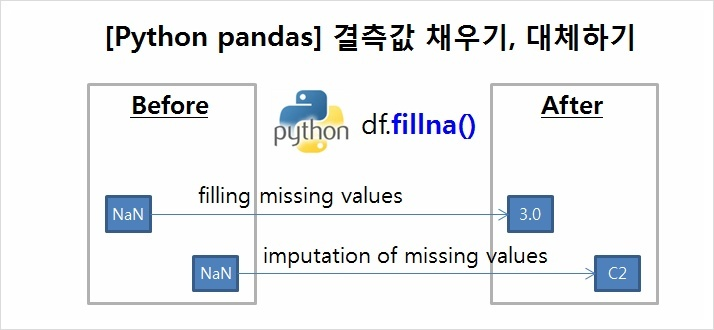

#### 9-1. 결측값을 특정 값으로 채우기 (replace missing values with scalar value) : df.fillna(0)
#### 9-2. 결측값을 앞 방향 혹은 뒷 방향으로 채우기 (fill gaps forward or backward) 
      : fillna(method='ffill' or 'pad'), fillna(method='bfill' or 'backfill')
#### 9-3. 앞/뒤 방향으로 결측값 채우는 회수를 제한하기 (limit the amount of filling)
     : fillna(method='ffill', limit=number), fillna(method='bfill', limit=number)
#### 9-4. 결측값을 변수별 평균으로 대체하기(filling missing values with mean per columns)
      : df.fillna(df.mean()), df.where(pd.notnull(df), df.mean(), axis='columns')
#### 9-5. 결측값을 다른 변수의 값으로 대체하기
      (filling missing values with another columns' values)

In [13]:
df.isnull().sum()

Yr_Mo_Dy     0
RPT          6
VAL          3
ROS          2
KIL          5
SHA          2
BIR          0
DUB          3
CLA          2
MUL          3
CLO          1
BEL          0
MAL          4
weekday      0
WeekCheck    0
dtype: int64

In [14]:
df = df.fillna(method='ffill').fillna(method='bfill')
df.isnull().sum()

Yr_Mo_Dy     0
RPT          0
VAL          0
ROS          0
KIL          0
SHA          0
BIR          0
DUB          0
CLA          0
MUL          0
CLO          0
BEL          0
MAL          0
weekday      0
WeekCheck    0
dtype: int64

### 10. 년도 - 월을 기준으로 모든 컬럼의 평균값을 구하여라

strftime()메소드는 Datetime을 형식 코드로 입력하고 출력에 지정된 특정 형식을 나타내는 문자열을 리턴합니다. 우리는%Y와%m을 형식 코드로 사용하여 년과 월을 추출합니다.

In [15]:
df.groupby(df['Yr_Mo_Dy'].dt.strftime('%Y-%m')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,weekday,WeekCheck
Yr_Mo_Dy,,,,,,,,,,,,,,
1961-01,14.932581,12.084194,13.431613,7.736774,11.215806,8.588065,11.184839,9.270968,9.085806,10.107419,13.880968,14.703226,2.935484,0.290323
1961-02,16.269286,14.975357,14.324643,9.116786,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786,3.000000,0.285714
1961-03,11.015806,11.296452,10.752903,7.137742,10.509355,8.866774,9.644194,9.829677,10.646129,11.251935,16.410968,15.637742,3.000000,0.258065
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333,3.166667,0.333333
1961-05,9.860968,8.735161,10.818065,5.892258,9.490323,6.574839,7.477097,8.177097,8.039355,8.499355,11.900323,12.011613,2.806452,0.258065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194,2.903226,0.258065
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333,3.100000,0.300000
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000,2.935484,0.290323


### DataFrame.to_period(freq=None, axis=0, copy=True)
#### 개요
to_period 메서드는 DatetimeIndex를 PeriodIndex로 변환하는 메서드 입니다.

#### 사용법
df.to_period(freq=None, axis=0, copy=True)  
freq : 원하는 시간 단위로 변환할 수 있습니다.  
axis : 변환할 기준 축 입니다.  
copy : 사본을 형성할지 여부입니다.  

#### 예시
먼저 기본적인 사용법 예시를위하여 DatetimeIndex 만들어 보겠습니다.

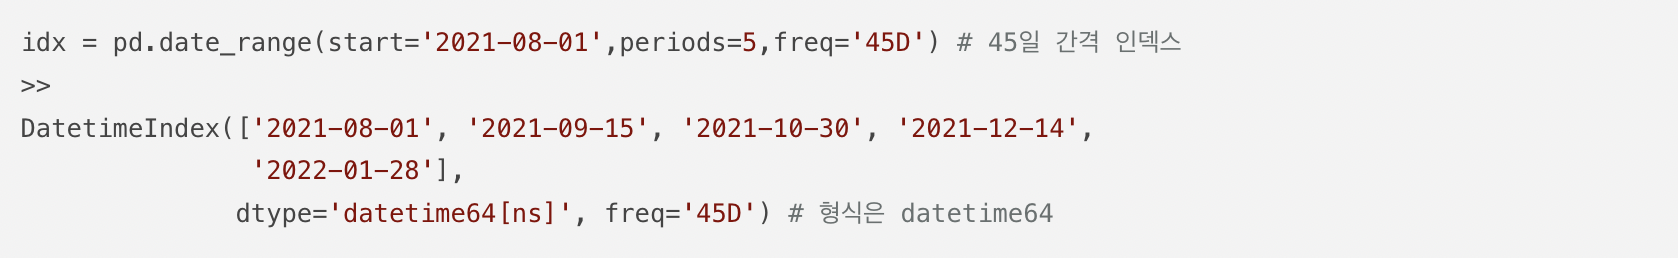

#### 기본사용법

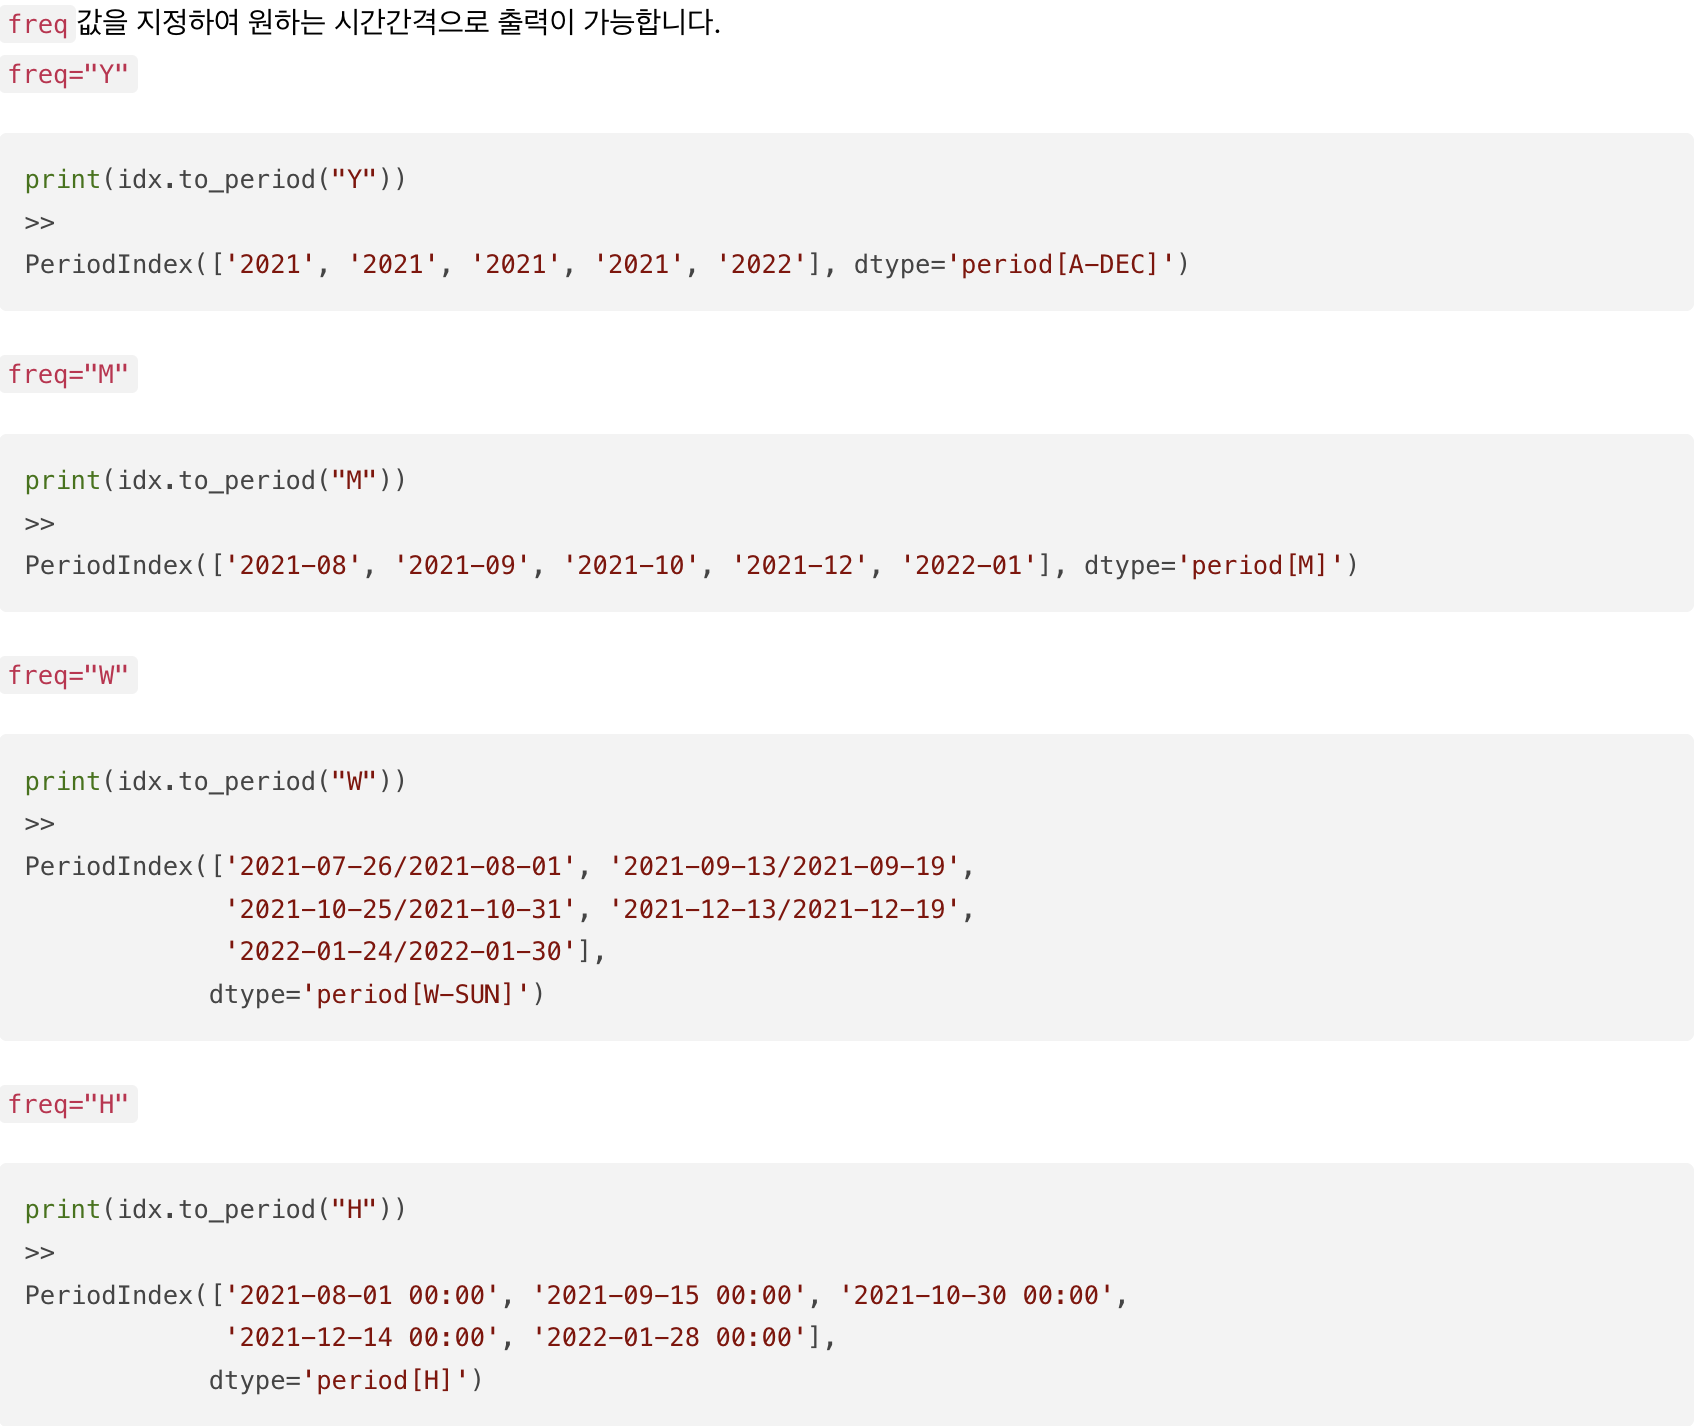

In [16]:
Ans = df.groupby(df.Yr_Mo_Dy.dt.to_period('M')).mean()
Ans

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,weekday,WeekCheck
Yr_Mo_Dy,,,,,,,,,,,,,,
1961-01,14.932581,12.084194,13.431613,7.736774,11.215806,8.588065,11.184839,9.270968,9.085806,10.107419,13.880968,14.703226,2.935484,0.290323
1961-02,16.269286,14.975357,14.324643,9.116786,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786,3.000000,0.285714
1961-03,11.015806,11.296452,10.752903,7.137742,10.509355,8.866774,9.644194,9.829677,10.646129,11.251935,16.410968,15.637742,3.000000,0.258065
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333,3.166667,0.333333
1961-05,9.860968,8.735161,10.818065,5.892258,9.490323,6.574839,7.477097,8.177097,8.039355,8.499355,11.900323,12.011613,2.806452,0.258065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194,2.903226,0.258065
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333,3.100000,0.300000
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000,2.935484,0.290323


### 11. RPT 컬럼의 값을 일자별 기준으로 1차차분하라

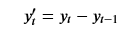

In [17]:
df.RPT.diff()

0        NaN
1      -0.33
2       3.79
3      -7.92
4       2.75
        ... 
6569    3.75
6570   -4.37
6571    0.79
6572    4.50
6573    1.83
Name: RPT, Length: 6574, dtype: float64

### 12. RPT와 VAL의 컬럼을 일주일 간격으로 각각 이동평균한값을 구하여라

In [18]:
df[['RPT', 'VAL']].rolling(window=7).mean().head(10)

,RPT,VAL
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,14.124286,12.727143
7,13.541429,11.982857
8,13.237143,11.392857
9,12.504286,10.570000


In [19]:
Ans= df[['RPT','VAL']].rolling(7).mean()
Ans.head(9)

,RPT,VAL
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,14.124286,12.727143
7,13.541429,11.982857
8,13.237143,11.392857
